# 地理数据探索

来自张炼的数据，10km的DEM

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import rasterio

In [2]:
from hydra import compose, initialize
import os

# 加载项目层面的配置
with initialize(version_base=None, config_path="../config"):
    cfg = compose(config_name="config")
os.chdir(cfg.root)

## DEM数据可视化

In [3]:
from abses_sce.env import Env
from abses import MainModel

model = MainModel(nature_class=Env, parameters=cfg)
model

<model-v0.2.0.alpha(init)>

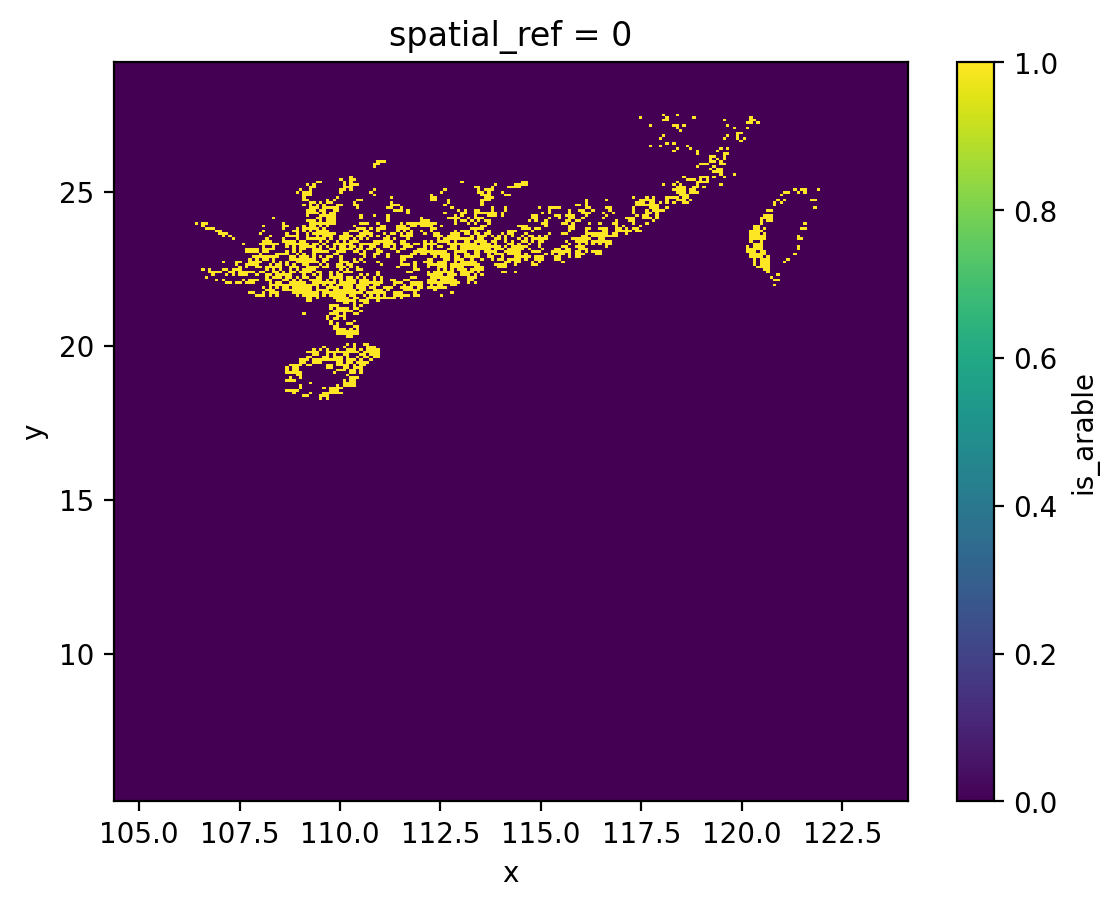

In [4]:
model.nature.dem.get_xarray("is_arable").plot()

In [5]:
model.nature.dem.get_xarray("dem").where(lambda x: (x > 0) & (x < 200)).plot()

ValueError: Attribute dem does not exist. Choose from {'aspect', 'is_arable', 'slope', 'elevation'}, or set `attr_name` to `None` to retrieve all.

In [ ]:
model.nature.dem.get_xarray("slope").where(lambda x: (x > 0) & (x < 10)).plot()

In [ ]:
model.nature.dem.get_xarray("slope").plot()

In [ ]:
model.nature.dem.get_xarray("arable").plot()

In [ ]:
with rasterio.open(cfg.db.slo) as dataset:
    band = dataset.read(1)
    nodata = dataset.nodata
    np.where(band == nodata, np.nan, band)

In [ ]:
model.nature.add_farmers()

In [ ]:
model.agents.select("Farmer")

## 泊松分布可视化

In [ ]:
from scipy.stats import poisson

import seaborn as sb

data_binom = poisson.rvs(mu=4, size=10000)
ax = sb.histplot(
    data_binom,
    kde=True,
    color="green",
    # hist_kws={"linewidth": 25,'alpha':1}
)
ax.set(xlabel="Poisson", ylabel="Frequency")

In [ ]:
np.random.poisson()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s = np.random.poisson(5, 10000)

count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()